# Decision Tree Algorithm
Single feature based tree breakdown to decide the final class of the sample. The main 2 element of this method is Entropy or splitting criteria and Information gain.

*The entropy/impurity or splitting criteria is the measure of uncertainity in the data set. The criteria value changes in every step split in the data set. So information gain is the difference between the entropy on before and after splitting of the data set based on a particular fieature. There are three methods of calculating the decision criteria. Gini Impurity and Entropy is the mostly used one.* 

\begin{align}
Gini \ Impurity \ I_{G}(t) = \sum p(i|t)(1 - p(i|t)) = 1 - \sum p(i|t)^2 \\
Entropy \ I_{H}(t) = - \sum p(i|t)log_{2}p(i|t) \\
Classificaiton \ Error \  I_{E} = 1 = max(p(i|t))
\end{align}

*Note: We calculate information gain in each stapes using any of these criteria. The information gain is calculated is as followes:*

\begin{equation*}
    IG(D_{p}, f) = I(D_{p}) - \sum \dfrac{N_{j}}{N_{p}}I(D_{p})
\end{equation*}

Here $f$ is the feature to peform split. $p$ and $j$ represent the data sets of parent and jth child node. $I$ is out impurity measere.

### Regular Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Plot setting
plt.style.use('bmh')
plt.rcParams["font.size"] = "20"

### sensitivity of Different split Criteria

In [3]:
# Impurity measures
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

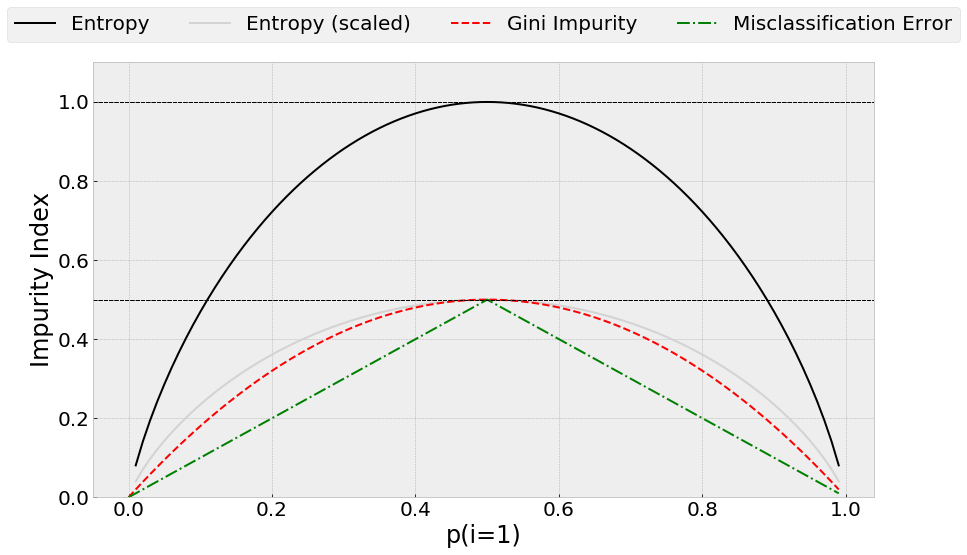

In [5]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
color = ['black', 'lightgray', 'red', 'green', 'cyan']
ltype = ['-', '-', '--', '-.']
criteria_list = ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error']
criteria_value = [ent, sc_ent, gini(x), err]
for i, lab, ls, c, in zip(criteria_value, criteria_list , ltype, color):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=5, fancybox=True, shadow=False)
    ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
    ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
    plt.ylim([0, 1.1])
    plt.xlabel('p(i=1)')
    plt.ylabel('Impurity Index')

### Data Load & Exploration

In [6]:
from sklearn import datasets

In [7]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Coass labels: ', np.unique(y))

Coass labels:  [0 1 2]


### Preprocession

In [8]:
print("Feature Matrix : \n", X[:3])
print("Target Column Vector : \n", y[:3])

Feature Matrix : 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]]
Target Column Vector : 
 [0 0 0]


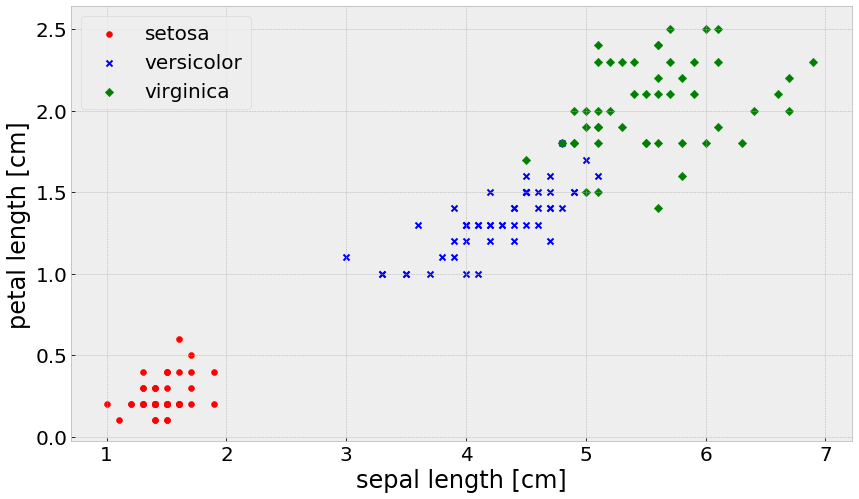

In [9]:
plt.figure(figsize=(14,8))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label = 'versicolor')
plt.scatter(X[100:, 0], X[100:, 1], color='green', marker='D', label = 'virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### Training A Linear Model

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

### Evaluating The Model

### Checking The Disission Boundry

In [20]:
from neuralbase import plot_decision_regions_combined

In [21]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

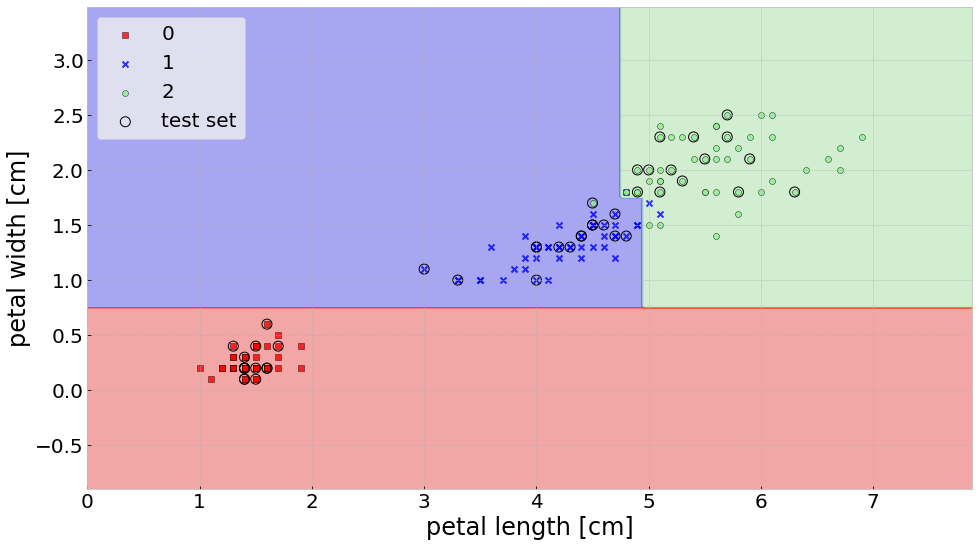

In [22]:
plt.figure(figsize=(14, 8))
plot_decision_regions_combined(
    features=X_combined, targets=y_combined, 
    classifier=tree, test_idx=range(105, 150)
)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

*Note: Result Shows the SVM Applcation was able to seperate the multiclass region successfully*

### Tree Visualization

In [24]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

In [26]:
dot_data = export_graphviz(
    tree,
    filled=True,
    rounded=True,
    class_names=['Setosa',
    'Versicolor',
    'Virginica'],
    feature_names=['petal length',
    'petal width'],
    out_file=None
)
graph = graph_from_dot_data(dot_data)

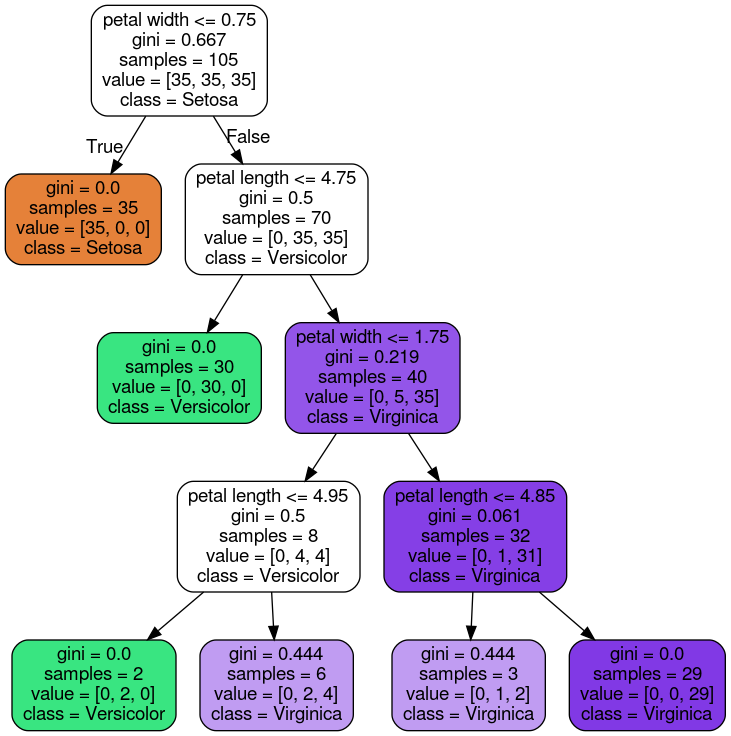

In [28]:
Image(graph.create_png())

*Note: In each step the graph shows the split criteria and sample distribution.*

### Referances

[1] [Python Machine Learning](https://sebastianraschka.com/books.html)